<a href="https://colab.research.google.com/github/bkim9/Resume/blob/main/12_8_RMSProp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install d2l==1.0.3
!pip install -U mxnet-cu112==1.9.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 55.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 93.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 65.8 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall:

     ━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━ 281.8/499.4 MB 12.9 MB/s eta 0:00:17
ERROR: Operation cancelled by user


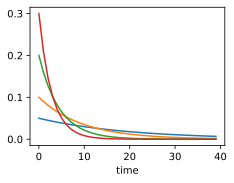

In [ ]:
import math
import torch
from d2l import torch as d2l
d2l.set_figsize()
gammas = [0.95, 0.9, 0.8, 0.7]
for gamma in gammas:
  x = torch.arange(40).detach().numpy()
  d2l.plt.plot(x, (1-gamma) * gamma ** x, label=f'gamma = {gamma:.2f}')
d2l.plt.xlabel('time');

epoch 20, x1: -0.010599, x2: 0.000000


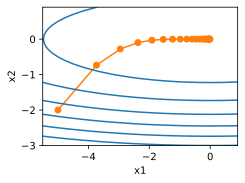

In [ ]:
def rmsprop_2d(x1, x2, s1, s2):
  g1, g2, eps = 0.2 * x1, 4 * x2, 1e-6
  s1 = gamma * s1 + (1 - gamma)* g1 ** 2
  s2 = gamma * s2 + (1 - gamma) * g2 **2
  x1 -= eta / math.sqrt(s1 + eps) * g1
  x2 -= eta / math.sqrt(s2 + eps) * g2
  return x1, x2, s1, s2

def f_2d(x1, x2):
  return 0.1 * x1 ** 2 + 2 * x2 ** 2

eta, gamma = 0.4, 0.9
d2l.show_trace_2d(f_2d, d2l.train_2d(rmsprop_2d))

In [ ]:
def init_rmsprop_states(feature_dim):
  s_w = torch.zeros((feature_dim, 1))
  s_b = torch.zeros(1)
  return (s_w, s_b)

def rmsprop(params, states, hyperparams):
  gamma, eps = hyperparams['gamma'], 1e-6
  for p, s in zip(params, states):
    with torch.no_grad():
      s[:] = gamma * s + (1 - gamma) * torch.square(p.grad)
      p[:] -= hyperparams['lr'] * p.grad / torch.sqrt(s + eps)
    p.grad.data.zero_()


loss: 0.244, 0.209 sec/epoch


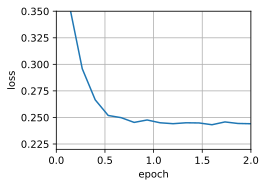

In [ ]:
data_iter, feature_dim = d2l.get_data_ch11(batch_size=10)
d2l.train_ch11(rmsprop, init_rmsprop_states(feature_dim), {'lr': 0.01, 'gamma': 0.9}, data_iter, feature_dim);

loss: 0.245, 0.229 sec/epoch


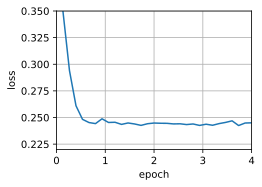

In [ ]:
trainer = torch.optim.RMSprop
d2l.train_concise_ch11(trainer, {'lr': 0.01, 'alpha':0.9}, data_iter)